In [21]:
import anndata as ad
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scanpy as sc

import os

In [2]:
brain_organoids_folder = "/omics/groups/OE0540/internal/projects/HCA_organoid_2/cemm_sabrina-20Jul2022"
eqtls_file = os.path.join(brain_organoids_folder, "eQTL_mapping/eSNPs_significant_all_celltypes_HVGs.tsv")
rna_file = os.path.join(brain_organoids_folder, "outputs_allsamples/sabrina_allsamples_rna_final_after_atac.h5ad")
atac_file = os.path.join(brain_organoids_folder, "atac_tf_idf_normalised.h5ad")

In [3]:
borgs_rna = sc.read_h5ad(rna_file)
borgs_rna

AnnData object with n_obs × n_vars = 265053 × 30500
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'sample_qclvl', 'donor_id', 'clone', 'organoid', 'donor', 'clone_qclvl', 'organoid_qclvl', 'donor_qclvl', 'cellbender', 'doubletfinder', 'S_score', 'G2M_score', 'phase', 'mt_cat', 'ribo_cat', 'leiden', 'CellType', 'Batch', 'celltype_predicted_vertesy', 'stressed_vs_unstressed_celltypes', 'glia_neuron_celltpyes', 'gruffi'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances

/tmp/ipykernel_22210/2857121713.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = borgs_rna.obs[['donor', 'celltype_predicted_vertesy']].groupby(['donor', 'celltype_predicted_vertesy']).size().unstack(fill_value=0)


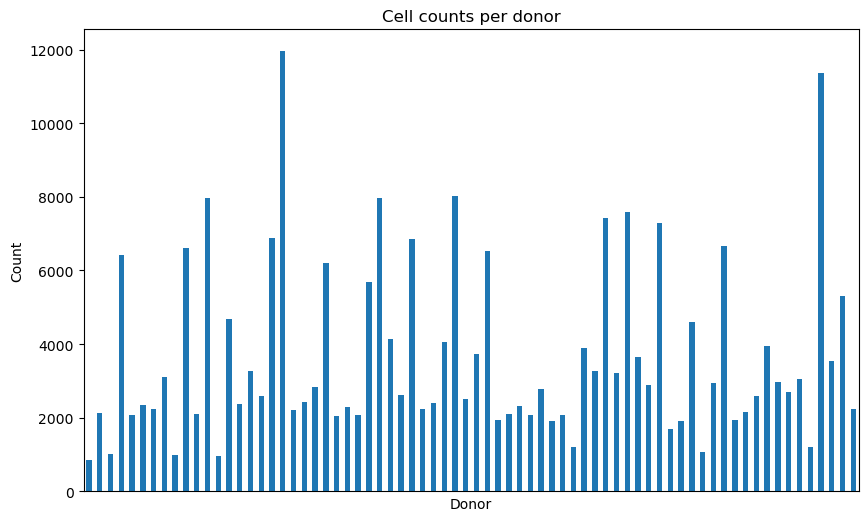

In [36]:
grouped = borgs_rna.obs[['donor', 'celltype_predicted_vertesy']].groupby(['donor', 'celltype_predicted_vertesy']).size().unstack(fill_value=0)
grouped_sum = grouped.sum(axis=1)
grouped_sum.plot(kind='bar', figsize=(10, 6))
plt.title('Cell counts per donor')
plt.xlabel('Donor')
plt.ylabel('Count')
plt.xticks([])
plt.show()

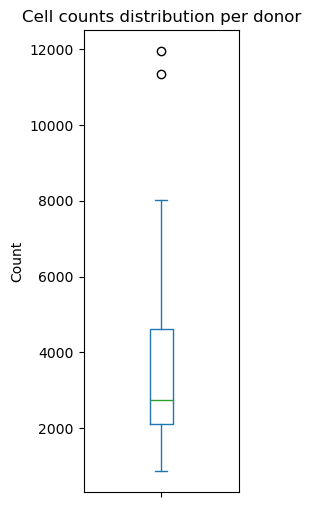

In [43]:
grouped_sum.plot(kind='box', figsize=(2, 6))
plt.title('Cell counts distribution per donor')
plt.ylabel('Count')
plt.show()

In [44]:
grouped_sum.describe()

count       72.000000
mean      3681.291667
std       2404.429255
min        863.000000
25%       2108.500000
50%       2732.500000
75%       4612.750000
max      11948.000000
dtype: float64

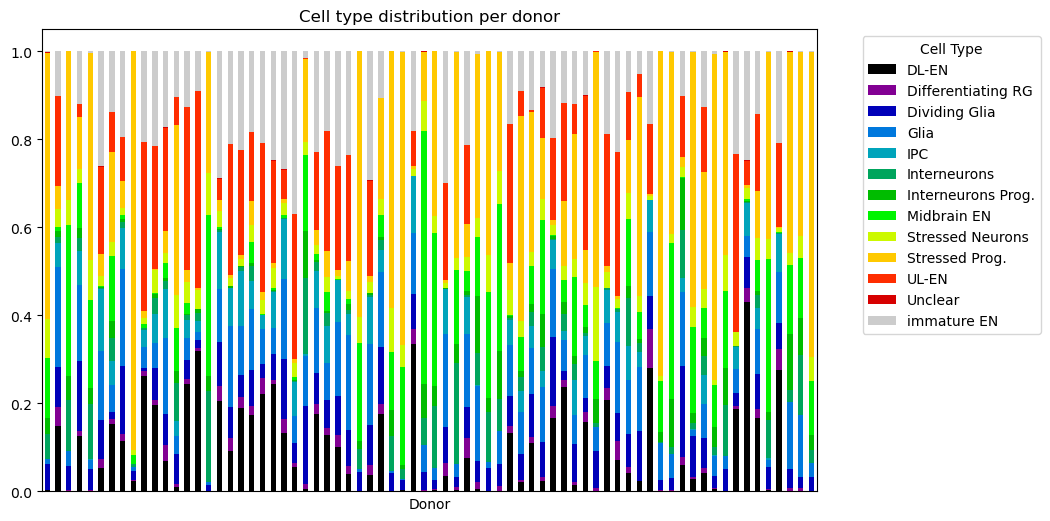

In [32]:
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)
grouped_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='nipy_spectral')
plt.title('Cell type distribution per donor')
plt.xlabel('Donor')
plt.xticks([])
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

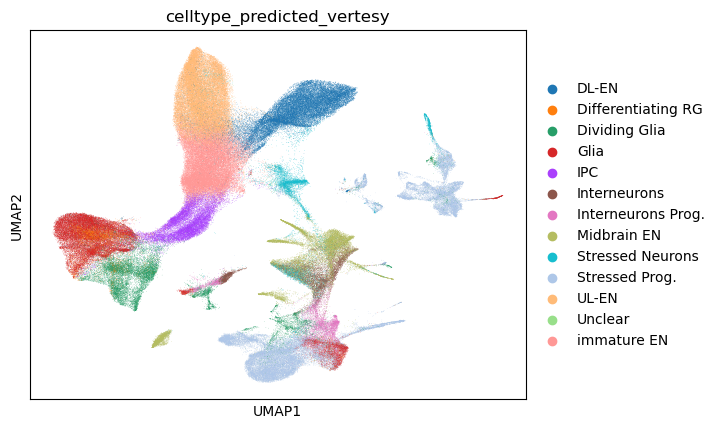

In [7]:
sc.pl.umap(borgs_rna, color='celltype_predicted_vertesy')

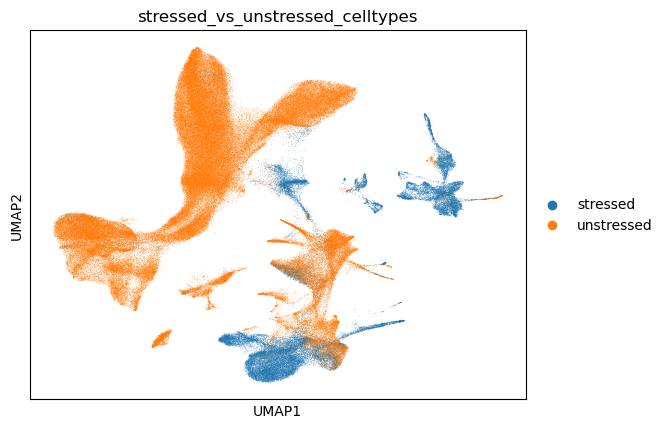

In [8]:
sc.pl.umap(borgs_rna, color='stressed_vs_unstressed_celltypes')

In [63]:
borgs_rna

AnnData object with n_obs × n_vars = 265053 × 30500
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'sample_qclvl', 'donor_id', 'clone', 'organoid', 'donor', 'clone_qclvl', 'organoid_qclvl', 'donor_qclvl', 'cellbender', 'doubletfinder', 'S_score', 'G2M_score', 'phase', 'mt_cat', 'ribo_cat', 'leiden', 'CellType', 'Batch', 'celltype_predicted_vertesy', 'stressed_vs_unstressed_celltypes', 'glia_neuron_celltpyes', 'gruffi'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances

In [100]:
borgs_atac = sc.read_h5ad(atac_file,backed='r')
borgs_atac

AnnData object with n_obs × n_vars = 288900 × 736845 backed at '/omics/groups/OE0540/internal/projects/HCA_organoid_2/cemm_sabrina-20Jul2022/atac_tf_idf_normalised.h5ad'
    obs: 'BlacklistRatio', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PassQC', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample', 'TSSEnrichment', 'celltype', 'cellType', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'donor_id', 'clone', 'organoid', 'donor', 'leiden', 'stressed_vs_unstressed_celltypes', 'Batch', 'ReadsInPeaks', 'FRIP'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'

In [103]:
borgs_atac.var

,seqnames,start,end,width,strand,score,replicateScoreQuantile,groupScoreQuantile,Reproducibility,GroupReplicate,distToGeneStart,nearestGene,peakType,distToTSS,nearestTSS,GC,idx,N
chr1:804695:805195:501:*:1,chr1,804695,805195,501,*,3.01127,0.273,0.151,2.0,23._.sSL0094,12425,FAM87B,Distal,12,uc057awz.1,0.3992,1,0
chr1:811018:811518:501:*:2,chr1,811018,811518,501,*,17.72120,0.734,0.799,22.0,3._.sSL0110A,6102,FAM87B,Distal,6102,uc031tlt.2,0.3513,2,0
chr1:817077:817577:501:*:3,chr1,817077,817577,501,*,19.46110,0.898,0.918,45.0,5._.sSL0165,43,FAM87B,Promoter,43,uc031tlt.2,0.4810,3,0
chr1:817816:818316:501:*:4,chr1,817816,818316,501,*,10.06330,0.798,0.798,12.0,12._.sSL0106,694,FAM87B,Exonic,694,uc031tlt.2,0.5230,4,0
chr1:819782:820282:501:*:5,chr1,819782,820282,501,*,2.71269,0.146,0.146,NaN,31._.1,2660,FAM87B,Distal,2660,uc031tlt.2,0.4990,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:155891803:155892303:501:*:19674,chrX,155891803,155892303,501,*,11.25430,0.850,0.886,25.0,2._.sSL0138,222108,TMLHE,Distal,10674,uc004fnt.4,0.3972,19674,0
chrX:155941826:155942326:501:*:19675,chrX,155941826,155942326,501,*,9.46511,0.792,0.849,34.0,3._.sSL0161,272131,TMLHE,Distal,55504,uc004fnv.2,0.3633,19675,0
chrX:155956608:155957108:501:*:19676,chrX,155956608,155957108,501,*,42.66500,0.827,0.879,36.0,3._.sSL0116A,286913,TMLHE,Distal,40722,uc004fnv.2,0.3952,19676,0
chrX:155959222:155959722:501:*:19677,chrX,155959222,155959722,501,*,7.84954,0.722,0.757,10.0,8._.sSL0181,289527,TMLHE,Distal,38108,uc004fnv.2,0.4132,19677,0


In [11]:
borgs_atac

AnnData object with n_obs × n_vars = 288900 × 736845
    obs: 'BlacklistRatio', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PassQC', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample', 'TSSEnrichment', 'celltype', 'cellType', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'donor_id', 'clone', 'organoid', 'donor', 'leiden', 'stressed_vs_unstressed_celltypes', 'Batch', 'ReadsInPeaks', 'FRIP'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'

In [12]:
sc.tl.pca(borgs_atac)

KeyboardInterrupt: 

In [ ]:
sc.pl.pca(adata, color="celltype")

In [ ]:
sc.pl.pca_variance_ratio(borgs_atac, log=True)

In [ ]:
sc.pp.neighbors(borgs_atac, n_neighbors=10, n_pcs=40)
sc.tl.umap(borgs_atac)

In [ ]:
sc.pl.umap(borgs_atac,
           color='stressed_vs_unstressed_celltypes')

## eQTLS

In [4]:
eqtls = pd.read_csv(eqtls_file, sep='\t', header=0)
eqtls.astype({'snp_chromosome': 'int'}, {'snp_position': 'int'})
eqtls.columns

Index(['snp_id', 'p_value', 'beta', 'beta_se', 'empirical_feature_p_value',
       'feature_chromosome', 'feature_start', 'feature_end', 'gene_name',
       'n_samples', 'n_e_samples', 'alpha_param', 'beta_param', 'rho',
       'snp_chromosome', 'snp_position', 'assessed_allele', 'call_rate', 'maf',
       'hwe_p', 'feature_id', 'QTL', 'global_corrected_pValue',
       'global_corrected_pValue_BH', 'global_corrected_pValue_BF', 'celltype'],
      dtype='object')

In [9]:
eqtls[['p_value', 'empirical_feature_p_value', 'global_corrected_pValue', 'global_corrected_pValue_BH', 'global_corrected_pValue_BF']].describe()

,p_value,empirical_feature_p_value,global_corrected_pValue,global_corrected_pValue_BH,global_corrected_pValue_BF
count,2.470000e+03,2.470000e+03,2.470000e+03,2.470000e+03,2.470000e+03
mean,3.448511e-01,1.940703e-03,5.756953e-03,5.880283e-03,2.843000e-01
std,3.684872e-01,4.139232e-03,1.152633e-02,1.181241e-02,4.288795e-01
min,1.096740e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.679154e-04,2.037657e-98,1.636648e-97,1.636648e-97,1.544616e-95
50%,1.692375e-01,3.242156e-11,2.111162e-10,2.283162e-10,3.120295e-08
75%,7.291819e-01,1.190919e-03,4.282773e-03,4.334788e-03,8.118204e-01
max,9.891223e-01,2.469306e-02,4.982907e-02,6.691818e-02,1.000000e+00


In [13]:
(eqtls[['p_value', 'empirical_feature_p_value', 'global_corrected_pValue', 'global_corrected_pValue_BH', 'global_corrected_pValue_BF']] > 0.05).sum(axis=0)

p_value                       1360
empirical_feature_p_value        0
global_corrected_pValue          0
global_corrected_pValue_BH       7
global_corrected_pValue_BF     873
dtype: int64

In [46]:
len(eqtls)

2470

In [51]:
sum(eqtls['p_value'] < 0.05)

1110

In [51]:
sum(eqtls['p_value_'] < 0.05)

1110

In [82]:
cell_types_eqtl = set(eqtls.celltype.unique())
cell_types_rna = borgs_rna.obs.celltype_predicted_vertesy.unique()
cell_types_rna = map(lambda s: s.replace(" ", "_").replace(".", ""), cell_types_rna)
cell_types_rna = set (cell_types_rna)
cell_types_rna.difference(cell_types_eqtl)

{'Interneurons_Prog', 'Unclear'}

In [92]:
sum(eqtls['celltype'] == "Interneurons_Prog") + sum(eqtls['celltype'] == "Unclear")

0

In [95]:
eqtls.groupby('celltype').size().describe()

count     11.000000
mean     224.545455
std      220.059703
min        9.000000
25%       85.500000
50%      153.000000
75%      293.000000
max      768.000000
dtype: float64

In [16]:
eqtls.celltype.unique()

array(['immature_EN', 'Stressed_Prog', 'IPC', 'Glia', 'UL-EN',
       'Midbrain_EN', 'Dividing_Glia', 'DL-EN', 'Interneurons',
       'Stressed_Neurons', 'Differentiating_RG'], dtype=object)

In [31]:
eqtls_neur = eqtls[eqtls['celltype'] == 'Interneurons']
sum(eqtls_neur['p_value'] < 0.05)

138

In [32]:
eqtls_glia = eqtls[eqtls['celltype'] == 'Glia']
sum(eqtls_glia['p_value'] < 0.05)

187

/tmp/ipykernel_20948/1714241457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqtls_neur['minuslog10pvalue'] = -np.log10(eqtls_neur.p_value)
/tmp/ipykernel_20948/1714241457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqtls_neur.snp_chromosome = eqtls_neur.snp_chromosome.astype('category')
/tmp/ipykernel_20948/1714241457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

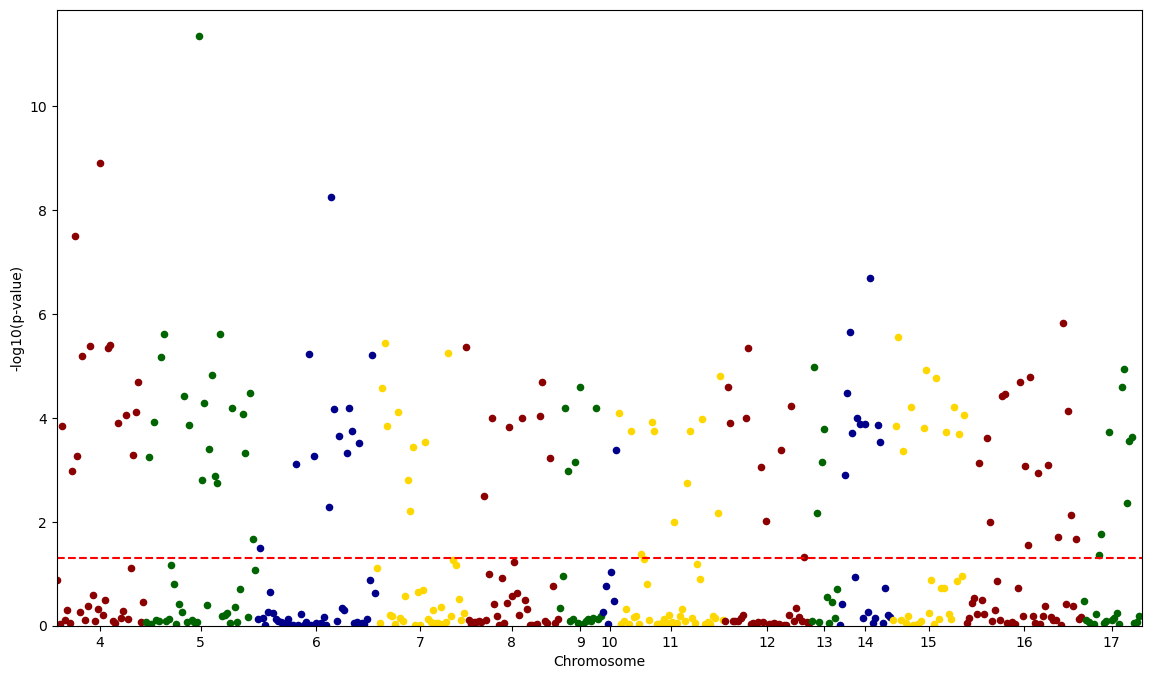

In [25]:
# Feature mutation
eqtls_neur['minuslog10pvalue'] = -np.log10(eqtls_neur.p_value)
eqtls_neur.snp_chromosome = eqtls_neur.snp_chromosome.astype('category')
eqtls_neur.snp_chromosome = eqtls_neur.snp_chromosome.cat.set_categories([i for i in range(24)], ordered=True)
eqtls_neur = eqtls_neur.sort_values(['snp_chromosome', 'snp_position'])

# How to plot gene vs. -log10(p_value) and colour it by chromosome?
eqtls_neur['ind'] = range(len(eqtls_neur))
eqtls_neur_grouped = eqtls_neur.groupby(('snp_chromosome'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(eqtls_neur_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    # ax.scatter(group['ind'], group['minuslog10pvalue'], color=colors[num % len(colors)], label=name, s=10)
    x_labels.append(name)
    # x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    x_labels_pos.append(group['ind'].mean())

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(eqtls_neur)])
ax.set_ylim([0, eqtls_neur['minuslog10pvalue'].max() + 0.5])

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('-log10(p-value)')

plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')

# show the graph
plt.show()

/tmp/ipykernel_20948/4140834601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqtls_glia['minuslog10pvalue'] = -np.log10(eqtls_glia.p_value)
/tmp/ipykernel_20948/4140834601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqtls_glia.snp_chromosome = eqtls_glia.snp_chromosome.astype('category')
/tmp/ipykernel_20948/4140834601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

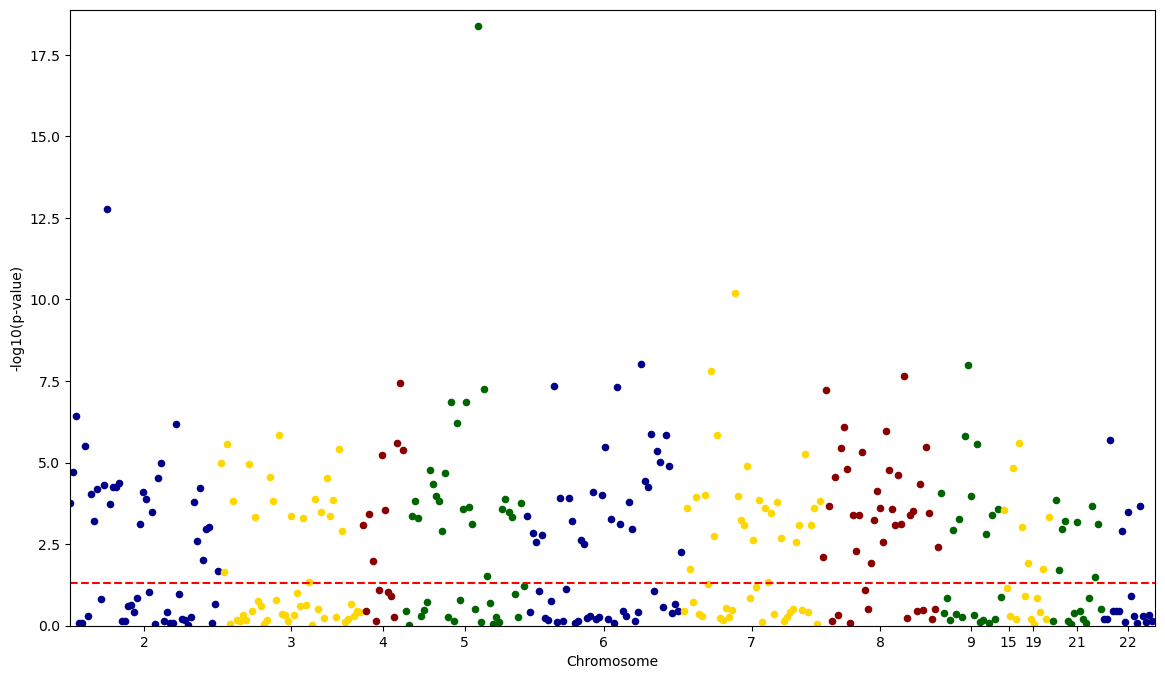

In [26]:
# Feature mutation
eqtls_glia['minuslog10pvalue'] = -np.log10(eqtls_glia.p_value)
eqtls_glia.snp_chromosome = eqtls_glia.snp_chromosome.astype('category')
eqtls_glia.snp_chromosome = eqtls_glia.snp_chromosome.cat.set_categories([i for i in range(24)], ordered=True)
eqtls_glia = eqtls_glia.sort_values(['snp_chromosome', 'snp_position'])

# How to plot gene vs. -log10(p_value) and colour it by chromosome?
eqtls_glia['ind'] = range(len(eqtls_glia))
eqtls_glia_grouped = eqtls_glia.groupby(('snp_chromosome'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(eqtls_glia_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    # ax.scatter(group['ind'], group['minuslog10pvalue'], color=colors[num % len(colors)], label=name, s=10)
    x_labels.append(name)
    # x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    x_labels_pos.append(group['ind'].mean())

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(eqtls_glia)])
ax.set_ylim([0, eqtls_glia['minuslog10pvalue'].max() + 0.5])

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('-log10(p-value)')

plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')

# show the graph
plt.show()